## Visual story telling part 2: Capital Metro data

The file [capmetro_UT.csv](../data/capmetro_UT.csv) contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:  

- _timestamp_: the beginning of the 15-minute window for that row of data
- _boarding_: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
- _alighting_: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
- _day_of_week_ and _weekend_: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
- _temperature_: temperature at that time in degrees F
- _hour_of_day_: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
- _month_: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question.  Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning.  Rather, the figure together with a concise caption should speak for itself as far as possible. 

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing.  (Faceting/panel plots might be especially useful here.)  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

capmetro_data = pd.read_csv('capmetro_UT.csv')

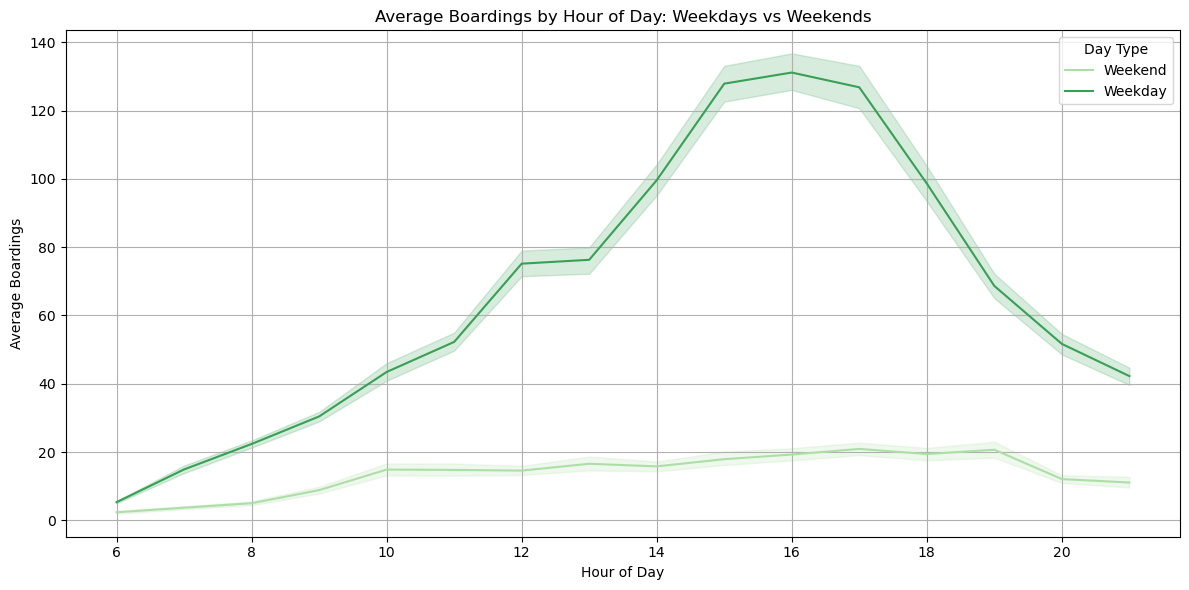

In [3]:
# Create a new column to differentiate between weekday and weekend
capmetro_data['day_type'] = capmetro_data['weekend'].apply(lambda x: 'Weekend' if x == 'weekend' else 'Weekday')

# Plot: Average boardings by hour of day, comparing weekdays to weekends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=capmetro_data, 
    x='hour_of_day', 
    y='boarding', 
    hue='day_type', 
    estimator='mean',
    palette="Greens"
)

plt.title('Average Boardings by Hour of Day: Weekdays vs Weekends')
plt.ylabel('Average Boardings')
plt.xlabel('Hour of Day')
plt.legend(title='Day Type')
plt.grid(True)

plt.tight_layout()
plt.show()

Average Boardings by Hour: Weekdays vs. Weekends: This line plot reveals clear peaks during weekday commuting hours, while weekends show more evenly spread ridership, highlighting distinct travel patterns.

/var/folders/x6/3b35cwjs3k39_8kwh_4l21q40000gn/T/ipykernel_24209/2748902343.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = capmetro_data.pivot_table(


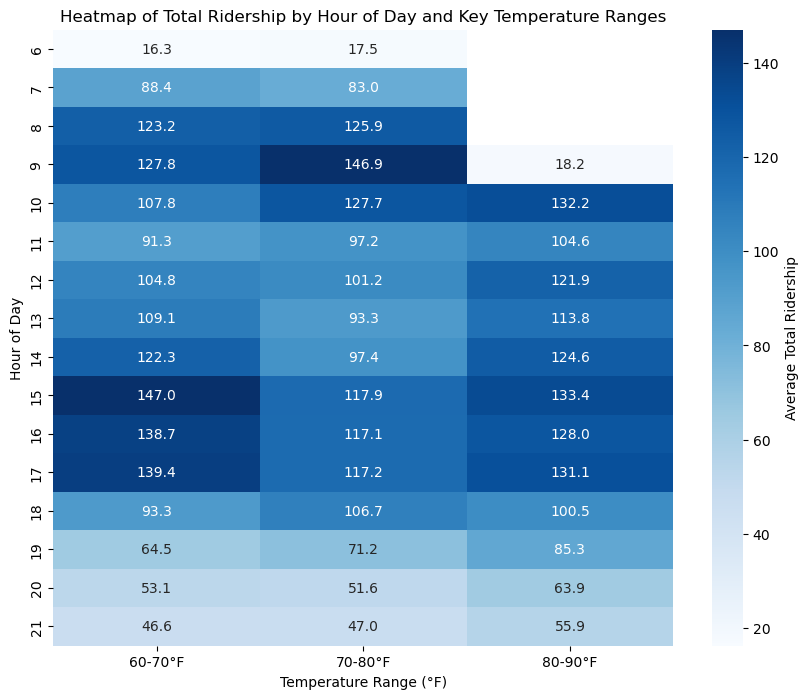

In [5]:
# Create a new column for total ridership (boarding + alighting)
capmetro_data['total_ridership'] = capmetro_data['boarding'] + capmetro_data['alighting']

# Bin the temperature data into defined ranges
capmetro_data['temp_bin'] = pd.cut(capmetro_data['temperature'], bins=[0, 60, 70, 80, 90, 100], labels=['<60°F', '60-70°F', '70-80°F', '80-90°F', '>90°F'])

# Prepare data for the heatmap
heatmap_data = capmetro_data.pivot_table(
    index='hour_of_day', 
    columns='temp_bin', 
    values='total_ridership', 
    aggfunc='mean'
)

# Plot the heatmap focusing on the most impactful temperature ranges
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data.loc[:, ['60-70°F', '70-80°F', '80-90°F']], 
    cmap="Blues", 
    annot=True, 
    fmt=".1f", 
    cbar_kws={'label': 'Average Total Ridership'}
)

plt.title('Heatmap of Total Ridership by Hour of Day and Key Temperature Ranges')
plt.ylabel('Hour of Day')
plt.xlabel('Temperature Range (°F)')
plt.show()

Impact of Temperature on Ridership: This heatmap highlights how total ridership (boarding + alighting) peaks during moderate temperatures (60-80°F), especially during morning and evening commute hours. As temperatures rise above 80°F, ridership drops, particularly in the afternoon, indicating that extreme heat discourages bus use. This visualization clearly shows how both time of day and weather conditions influence public transportation patterns around the UT-Austin campus.

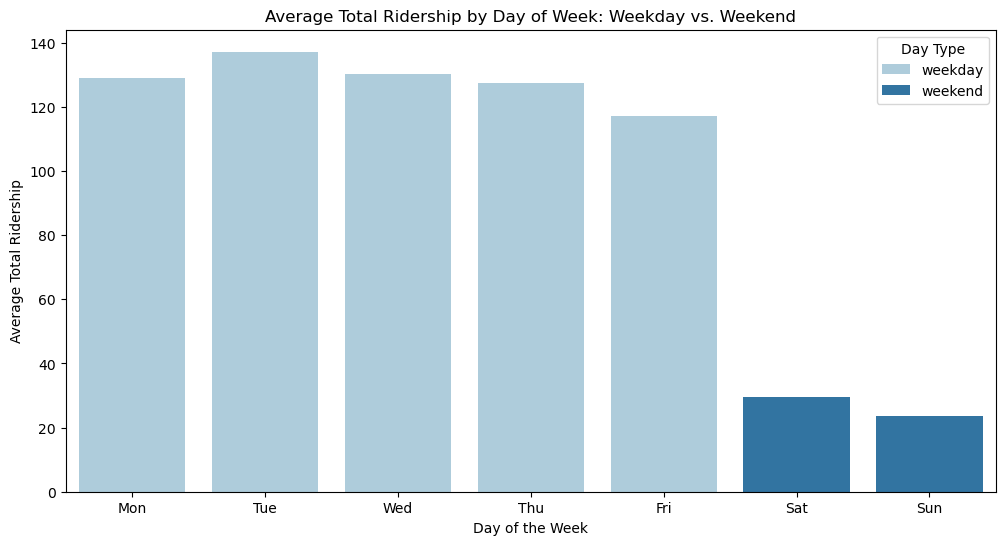

In [9]:
# Group the data by day of the week and whether it's a weekend
grouped_data = capmetro_data.groupby(['day_of_week', 'weekend'])['total_ridership'].mean().reset_index()

# Sort the day_of_week to ensure correct order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
grouped_data['day_of_week'] = pd.Categorical(grouped_data['day_of_week'], categories=day_order, ordered=True)

# Plot: Bar plot of average total ridership by day of the week, segmented by weekday/weekend
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x='day_of_week',
    y='total_ridership',
    hue='weekend',
    palette='Paired'
)

plt.title('Average Total Ridership by Day of Week: Weekday vs. Weekend')
plt.ylabel('Average Total Ridership')
plt.xlabel('Day of the Week')
plt.legend(title='Day Type')
plt.show()

Weekdays: Higher ridership, peaking on Thursday, likely due to commuting and academic schedules.
Weekends: Lower ridership, with Saturday slightly busier than Sunday, reflecting weekend activities.